In [93]:
import pandas_profiling 
import datetime as dt
import pandas as pd
import numpy as np
import graphviz
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow import keras
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [94]:
warnings.filterwarnings('ignore')

In [95]:
train_df = pd.read_csv('data.csv')

In [96]:
train_df.isna().sum()

mcg      0
gvh      0
lip      0
chg      0
aac      0
alm1     0
alm2     0
class    0
dtype: int64

In [97]:
train_df.head()

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [98]:
train_df['class'] = train_df['class'].factorize()[0]

In [99]:
train_df

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,0
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,0
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,0
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,0
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,7
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,7
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,7
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,7


In [100]:
cor = train_df.corr()

In [101]:
cor

,mcg,gvh,lip,chg,aac,alm1,alm2,class
mcg,1.000000,0.454805,0.146841,0.070266,0.220699,0.396979,0.167086,0.642482
gvh,0.454805,1.000000,0.043804,0.018466,0.069824,0.173492,-0.120199,0.669773
lip,0.146841,0.043804,1.000000,0.311951,0.070190,0.095788,-0.057570,0.162742
chg,0.070266,0.018466,0.311951,1.000000,-0.044726,-0.007654,-0.052188,0.017670
aac,0.220699,0.069824,0.070190,-0.044726,1.000000,0.279482,0.252675,0.119870
alm1,0.396979,0.173492,0.095788,-0.007654,0.279482,1.000000,0.809324,0.218859
alm2,0.167086,-0.120199,-0.057570,-0.052188,0.252675,0.809324,1.000000,-0.108573
class,0.642482,0.669773,0.162742,0.017670,0.119870,0.218859,-0.108573,1.000000


In [102]:
cor_target = abs(cor['class'])

In [103]:
cor_target

mcg      0.642482
gvh      0.669773
lip      0.162742
chg      0.017670
aac      0.119870
alm1     0.218859
alm2     0.108573
class    1.000000
Name: class, dtype: float64

In [104]:
relevant_features=cor_target[cor_target>0.1]

In [105]:
relevant_features

mcg      0.642482
gvh      0.669773
lip      0.162742
aac      0.119870
alm1     0.218859
alm2     0.108573
class    1.000000
Name: class, dtype: float64

In [106]:
data = [train_df['mcg'] ,train_df['gvh'],train_df['alm1'] ,train_df['lip'],train_df['aac'],train_df['alm2'],train_df['class'] ]

In [107]:
head = ['mcg','gvh','alm1','lip','aac','alm2','class']

In [108]:
new_df = pd.concat(data,axis=1,keys=head)

In [109]:
new_df

,mcg,gvh,alm1,lip,aac,alm2,class
0,0.49,0.29,0.24,0.48,0.56,0.35,0
1,0.07,0.40,0.35,0.48,0.54,0.44,0
2,0.56,0.40,0.37,0.48,0.49,0.46,0
3,0.59,0.49,0.45,0.48,0.52,0.36,0
4,0.23,0.32,0.25,0.48,0.55,0.35,0
...,...,...,...,...,...,...,...
331,0.74,0.56,0.68,0.48,0.47,0.30,7
332,0.71,0.57,0.35,0.48,0.48,0.32,7
333,0.61,0.60,0.39,0.48,0.44,0.38,7
334,0.59,0.61,0.42,0.48,0.42,0.37,7


In [110]:
new_df.describe

<bound method NDFrame.describe of       mcg   gvh  alm1   lip   aac  alm2  class
0    0.49  0.29  0.24  0.48  0.56  0.35      0
1    0.07  0.40  0.35  0.48  0.54  0.44      0
2    0.56  0.40  0.37  0.48  0.49  0.46      0
3    0.59  0.49  0.45  0.48  0.52  0.36      0
4    0.23  0.32  0.25  0.48  0.55  0.35      0
..    ...   ...   ...   ...   ...   ...    ...
331  0.74  0.56  0.68  0.48  0.47  0.30      7
332  0.71  0.57  0.35  0.48  0.48  0.32      7
333  0.61  0.60  0.39  0.48  0.44  0.38      7
334  0.59  0.61  0.42  0.48  0.42  0.37      7
335  0.74  0.74  0.53  0.48  0.31  0.52      7

[336 rows x 7 columns]>

## Lets see the box plot after Normalization :-
**Now the Values are Betweeen 0 and 1.**

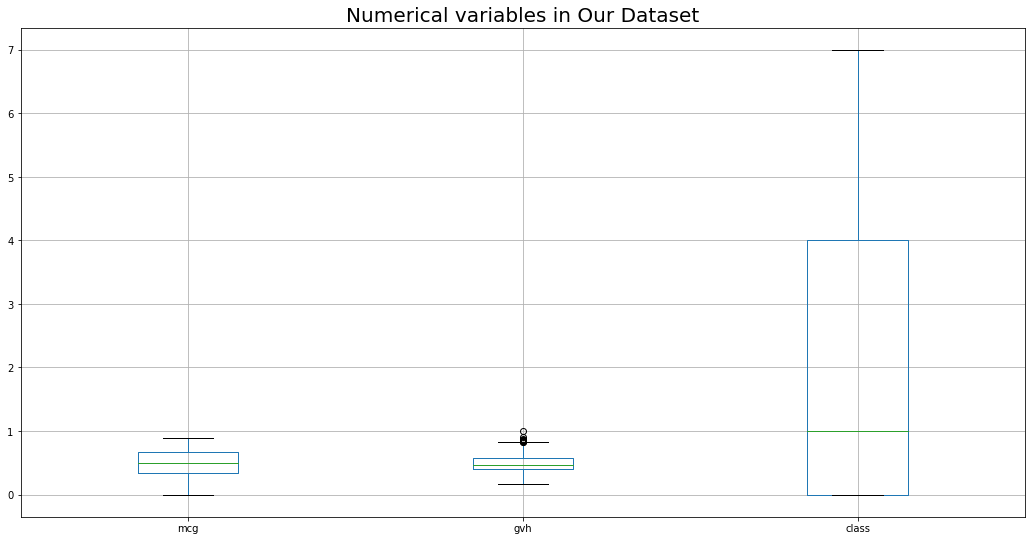

In [111]:
plt.figure(figsize=(18,9))
new_df[['mcg','gvh','class']].boxplot()
plt.title("Numerical variables in Our Dataset", fontsize=20)
plt.show()

## Using pandas profiling :-
**Pandas profiling can be used for expolration data analysis, It plot correlation matrix, gives you the valuable information about the feature and all**<br>
**For more info read this blog :- https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3**

In [112]:
start_time = dt.datetime.now()
print("Started at ", start_time)
report = pandas_profiling.ProfileReport(new_df)
report

Started at  2021-04-13 12:52:59.299004


Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# svm,randomforest,logisticregression

In [113]:
X= new_df.drop(['class'],axis=1)

In [114]:
y=new_df['class']

## Hyperparameter Tuning :-

In [115]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,5,20],
            'kernel': ['rbf','linear'],
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'max_depth':[1,5,9],
            'n_estimators': [1,5,20,100],
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,2,5]
        }
    }
}

## The Optimal Parameters are:-

In [116]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.856980,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.868964,"{'max_depth': 9, 'n_estimators': 100}"
2,logistic_regression,0.842098,{'C': 5}


### Random Forest model performance using cross_val_score :-

In [117]:
scores = cross_val_score(RandomForestClassifier(max_depth=9,n_estimators=100),X, y,cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.87 accuracy with a standard deviation of 0.03


### Logistic Regression model performance using cross_val_score :-

In [118]:
scores = cross_val_score(LogisticRegression(solver='liblinear',multi_class='auto',C=5),X, y,cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.84 accuracy with a standard deviation of 0.03


### SVM performance using cross_val_score

In [119]:
scores = cross_val_score(svm.SVC(gamma='auto',kernel='linear',C=20),X, y,cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.85 accuracy with a standard deviation of 0.04


**As it is clearly visible that Random Forest is best classifier for our prediction**

In [120]:
x_train,x_test,y_train,y_test=train_test_split( X, y, test_size=0.3, random_state=42)

In [121]:
model = RandomForestClassifier(max_depth=9,n_estimators=100)

In [122]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=9)

In [123]:
y_pred = model.predict(x_test)

In [124]:
accuracy_score(y_test, y_pred)*100

90.0990099009901

## Confusion matrix for the same :-

Text(24.0, 0.5, 'Truth')

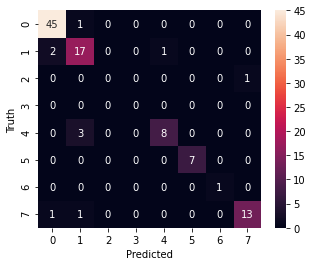

In [125]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
import seaborn as sns
plt.figure(figsize =(5,4))
sns.heatmap(cm,annot=True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Conclusion:-
**Random Forest Classifier is the best fitted classifier for our prediction.It has cross_val_score greater than svm and logistic regression.<br>On training and testing on our dataset, Our model gave a accuracy of greater than 85%.**<br>
#### Key learning :-
**Learnt about confusion matrix,classifiers,feature extraction techniques,how to process raw data,feature scaling,how to make model with better accuracy using data preprocessing and pandas profiling.**